In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import datetime
import math

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#!ls "/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/data"

### Reading in data from various sensors stored in  csv files for airquality data
1. Get a list of all the filenames containing data from various sensors using the os python module.
2. Turn those into a list of dataframes using pandas

In [3]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)

In [6]:
#airquality_data = combined_df
#airquality_data = pd.read_csv('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/Bugolobi(ambrosoli)/bugolobi.csv')

root_data_dir = 'data'
base_dir ='data\AirQuality\AirQo'
#unit_name = 'Makindye'
#base_dir = os.path.join(base_dir, unit_name)

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bugolobi(ambrosoli)','bugolobi.csv'))
#filepath = os.path.join(base_dir,'Bugolobi(ambrosoli)')

airquality_data = pd.read_csv(os.path.join(base_dir,'Makerere','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
filepath = os.path.join(base_dir,'Makerere')
#airquality_data = pd.read_csv(os.path.join(base_dir,'Makindye','makindye_rainbow_international_school.csv'))
#filepath = os.path.join(base_dir, 'Makindye')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bukoto(kisu)','bukoto_kisu.csv'))
#filepath= os.path.join(base_dir,'Bukoto(kisu)')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Mulago','mulago.csv'))
#filepath= os.path.join(base_dir,'Mulago')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Lubowa','lubowa_isu.csv'))
#filepath = os.path.join(base_dir,'Lubowa')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)','nema.csv'))
#filepath = os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)')

#airquality_data = pd.read_csv(os.path.join(base_dir, 'Rubaga_Mobile','mobile_unit_rubaga.csv'))
#filepath = os.path.join(base_dir, 'Rubaga_Mobile')

airquality_data.head(10)

,TimeStamp,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour,EVI,NDVI,humidity (%),precipitation (mm),...,temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
0,2017-09-09 18:00:00,5.52,6.93,9.73,18,0 days 18:00:00.000000000,0.2133,0.3988,73,0.0,...,23.27,0.44,0,0,0,0,0,1,0,0
1,2017-09-09 19:00:00,7.89,9.97,14.24,19,0 days 19:00:00.000000000,0.2133,0.3988,77,0.0,...,22.72,0.38,0,0,1,0,0,0,0,0
2,2017-09-09 20:00:00,9.55,12.09,16.99,20,0 days 20:00:00.000000000,0.2133,0.3988,80,0.0,...,22.29,0.37,0,0,0,0,0,1,0,0
3,2017-09-09 21:00:00,10.09,12.97,18.97,21,0 days 21:00:00.000000000,0.2133,0.3988,82,0.0,...,21.71,0.34,0,1,0,0,0,0,0,0
4,2017-09-09 22:00:00,9.66,12.53,18.17,22,0 days 22:00:00.000000000,0.2133,0.3988,87,0.0,...,20.86,0.29,0,0,1,0,0,0,0,0
5,2017-09-09 23:00:00,10.01,12.87,18.33,23,0 days 23:00:00.000000000,0.2133,0.3988,90,0.0,...,20.30,0.46,0,0,0,0,0,1,0,0
6,2017-09-10 00:00:00,9.37,11.92,16.35,0,0 days 00:00:00.000000000,0.2133,0.3988,91,0.0,...,20.30,0.59,0,0,0,0,0,1,0,0
7,2017-09-10 01:00:00,9.29,11.66,15.12,1,0 days 01:00:00.000000000,0.2133,0.3988,91,0.0,...,20.14,0.99,0,0,0,0,0,1,0,0
8,2017-09-10 02:00:00,9.91,12.43,15.28,2,0 days 02:00:00.000000000,0.2133,0.3988,89,0.0,...,20.15,1.19,0,0,0,0,0,1,0,0
9,2017-09-10 03:00:00,8.61,10.61,12.72,3,0 days 03:00:00.000000000,0.2133,0.3988,89,0.0,...,19.78,0.69,1,0,0,0,0,0,0,0


In [13]:
airquality_data["TimeStamp"] = pd.to_datetime(airquality_data["TimeStamp"])
airquality_data = airquality_data.set_index('TimeStamp')

In [16]:
airquality_data = airquality_data.drop(['Hour'], axis=1)

In [17]:
airquality_data.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,5.52,6.93,9.73,18,0.2133,0.3988,73,0.0,87.50,0.9,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,7.89,9.97,14.24,19,0.2133,0.3988,77,0.0,87.58,0.0,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,9.55,12.09,16.99,20,0.2133,0.3988,80,0.0,87.67,0.0,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,10.09,12.97,18.97,21,0.2133,0.3988,82,0.0,87.66,0.0,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,9.66,12.53,18.17,22,0.2133,0.3988,87,0.0,87.68,0.0,20.86,0.29,0,0,1,0,0,0,0,0


In [18]:
airquality_data.tail()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,
2019-03-31 19:00:00,4.69,6.00,6.02,19,0.2376,0.3732,73,0.0,87.47,0.08,24.46,0.44,0,0,0,0,0,0,1,0
2019-03-31 20:00:00,4.64,5.88,5.90,20,0.2376,0.3732,80,0.0,87.53,0.00,23.84,0.51,0,0,0,0,0,0,0,1
2019-03-31 21:00:00,5.07,6.35,6.36,21,0.2376,0.3732,83,0.0,87.58,0.00,23.47,0.58,0,0,0,0,0,1,0,0
2019-03-31 22:00:00,6.17,7.54,7.55,22,0.2376,0.3732,83,0.0,87.62,0.00,23.10,0.49,0,0,0,0,1,0,0,0
2019-03-31 23:00:00,7.34,8.72,8.73,23,0.2376,0.3732,81,0.0,87.64,0.00,22.77,0.40,0,0,0,0,0,1,0,0


In [20]:
show_dataframe_info(airquality_data)

(12485, 20)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'hour', 'EVI', 'NDVI', 'humidity (%)', 'precipitation (mm)', 'pressure (kPa)', 'radiation (W/m2)', 'temperature (oC)', 'windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12485 entries, 2017-09-09 18:00:00 to 2019-03-31 23:00:00
Data columns (total 20 columns):
PM1(Ug/m3)            12485 non-null float64
PM2.5(Ug/m3)          12485 non-null float64
PM10(Ug/m3)           12485 non-null float64
hour                  12485 non-null int64
EVI                   12485 non-null float64
NDVI                  12485 non-null float64
humidity (%)          12485 non-null int64
precipitation (mm)    12485 non-null float64
pressure (kPa)        12485 non-null float64
radiation (W/m2)      12485 non-null float64
temperature (oC)      12485 non-null float64
windspeed (m/

In [21]:
airquality_data.describe()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
count,1.248500e+04,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,3.028915e+14,10.673821,15.369912,11.499960,0.210689,0.379469,-100.709251,0.128783,87.677032,157.677950,22.567326,-101.547885,0.103564,0.063356,0.074329,0.098438,0.214257,0.219143,0.123588,0.103324
std,1.971218e+15,7.022369,11.679562,6.922913,0.034487,0.042931,1331.806401,1.207448,0.183153,233.664002,3.449116,1007.269962,0.304707,0.243612,0.262316,0.297918,0.410322,0.413682,0.329124,0.304394
min,1.000000e-02,0.010000,0.010000,0.000000,0.158000,0.292000,-9998.000000,0.000000,87.060000,0.000000,15.470000,-9998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.520000e+00,6.790000,9.510000,5.000000,0.178400,0.345000,66.000000,0.000000,87.550000,0.000000,19.870000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.830000e+00,10.820000,14.240000,11.000000,0.212600,0.373200,82.000000,0.000000,87.670000,3.370000,21.580000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.910000e+00,12.430000,18.170000,18.000000,0.237600,0.417300,91.000000,0.000000,87.810000,276.020000,25.140000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.313056e+16,210.400000,228.260000,23.000000,0.270800,0.449100,100.000000,46.230000,88.200000,1057.280000,33.370000,36.910000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
values.shape

(587, 3)

### Separate Features From the Target

In [44]:
#target_column = 'PM2.5(Ug/m3)'
#feature_columns = [x for x in airquality_data.columns if x != target_column]
feature_columns = [0,2, 3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19]
target_column = [1]
features = airquality_data.iloc[:,feature_columns]
targets = airquality_data.iloc[:,target_column]

In [45]:
features.head()

,PM1(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,5.52,9.73,18,0.2133,0.3988,73,87.50,0.9,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,7.89,14.24,19,0.2133,0.3988,77,87.58,0.0,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,9.55,16.99,20,0.2133,0.3988,80,87.67,0.0,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,10.09,18.97,21,0.2133,0.3988,82,87.66,0.0,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,9.66,18.17,22,0.2133,0.3988,87,87.68,0.0,20.86,0.29,0,0,1,0,0,0,0,0


In [46]:
targets.head()

,PM2.5(Ug/m3)
TimeStamp,
2017-09-09 18:00:00,6.93
2017-09-09 19:00:00,9.97
2017-09-09 20:00:00,12.09
2017-09-09 21:00:00,12.97
2017-09-09 22:00:00,12.53



### separate test dataset from training dataset and validation dataset
- separate data on 70/10/20 training/validation/testing


In [40]:
training_data = len(airquality_data)
print(training_data)

training_data_length = math.floor(len(airquality_data)* 0.7)
print(training_data_length)

validation_data_length = math.floor(len(airquality_data)*0.1)
print(validation_data_length)

testing_data_length = math.floor(len(airquality_data)* 0.2)
print(testing_data_length)

print(str(training_data_length + validation_data_length + testing_data_length ))

12485
8739
1248
2497
12484


,PM1(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,5.520000e+00,9.73,18,0.2133,0.3988,73,0.0,87.50,0.90,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,7.890000e+00,14.24,19,0.2133,0.3988,77,0.0,87.58,0.00,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,9.550000e+00,16.99,20,0.2133,0.3988,80,0.0,87.67,0.00,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,1.009000e+01,18.97,21,0.2133,0.3988,82,0.0,87.66,0.00,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,9.660000e+00,18.17,22,0.2133,0.3988,87,0.0,87.68,0.00,20.86,0.29,0,0,1,0,0,0,0,0
2017-09-09 23:00:00,1.001000e+01,18.33,23,0.2133,0.3988,90,0.0,87.77,0.00,20.30,0.46,0,0,0,0,0,1,0,0
2017-09-10 00:00:00,9.370000e+00,16.35,0,0.2133,0.3988,91,0.0,87.74,0.00,20.30,0.59,0,0,0,0,0,1,0,0
2017-09-10 01:00:00,9.290000e+00,15.12,1,0.2133,0.3988,91,0.0,87.67,0.00,20.14,0.99,0,0,0,0,0,1,0,0
2017-09-10 02:00:00,9.910000e+00,15.28,2,0.2133,0.3988,89,0.0,87.63,0.00,20.15,1.19,0,0,0,0,0,1,0,0


In [65]:
training_features = features.iloc[0:training_data_length,:]
print(training_features.shape)
training_targets =  targets.iloc[0:training_data_length,:]
print(training_targets.shape)

validation_features = features.iloc[training_data_length:training_data_length+validation_data_length,:]
print(validation_features.shape)
validation_targets =  targets.iloc[training_data_length:training_data_length+validation_data_length,:]
print(validation_targets.shape)

testing_features = features.iloc[training_data_length+validation_data_length: training_data_length+validation_data_length+testing_data_length,:]
print(testing_features.shape)

testing_targets = targets.iloc[training_data_length+validation_data_length: training_data_length+validation_data_length+testing_data_length,:]
print(testing_targets.shape)

(8739, 18)
(8739, 1)
(1248, 18)
(1248, 1)
(2497, 18)
(2497, 1)


### Preprocess the data to a format a neural network can ingest.
- Normalising/Scaling data using minmax scaler in sklearn preprocessing for each dataset separately
- Generationg sequential data from the recent past (3hrs), along with a target pm2.5 value in the future (next day)  for the
  * training dataset
  * validation dataset
  * test dataset

### given data that goes back 3hrs, can we predict the next hour.

### training dataset

In [180]:
scaler = MinMaxScaler()
scaled_training_features = scaler.fit_transform(training_features)
print(scaled_training_features)
print(scaled_training_features.shape)

training_targets =  np.array(training_targets)
training_targets = training_targets.reshape(-1,1)
print('trainging target shape: ', training_targets.shape)

##given data that goes back 3hrs, can we predict the next hour.
forecasters = [] 
pollution_real = [] 
for i in range(3, scaled_training_features.shape[0]):
    forecasters.append(scaled_training_features[i-3:i, 0:18])
    pollution_real.append(training_targets[i, 0])
    
forecasters, pollution_real = np.array(forecasters), np.array(pollution_real)

print(pollution_real.shape)
print(forecasters.shape)
print(forecasters.shape[1])

[[4.19631862e-16 4.57734872e-02 7.82608696e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.00126873e-16 6.70120085e-02 8.26086957e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.26549540e-16 7.99623263e-02 8.69565217e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.00126873e-16 6.70120085e-02 8.26086957e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.26549540e-16 7.99623263e-02 8.69565217e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.67674985e-16 8.92865552e-02 9.13043478e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(8739, 18)
trainging target shape:  (8739, 1)
(8736,)
(8736, 3, 18)
3


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### validation dataset

In [137]:
scaled_validation_features = scaler.fit_transform(validation_features)
print(scaled_validation_features)
forecasters_validation = [] 
pollution_real_validation = [] 

validation_targets =  np.array(validation_targets)
validation_targets= validation_targets.reshape(-1,1)
print(validation_targets.shape)

for i in range(3, scaled_validation_features.shape[0]):
    forecasters_validation.append(scaled_validation_features[i-3:i, 0:18])
    pollution_real_validation.append(validation_targets[i, 0])
    
forecasters_validation, pollution_real_validation = np.array(forecasters_validation), np.array(pollution_real_validation)
#baseline_prediction_validation_values, baseline_actual_validation_values = np.array(baseline_prediction_validation_values),
#np.array(baseline_actual_validation_values)
print(forecasters_validation.shape)
print(pollution_real_validation.shape)

[[6.97609411e-16 2.06928949e-01 9.56521739e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.24264793e-16 2.08807986e-01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.75523524e-16 1.85554903e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.39898433e-16 4.15736935e-02 8.26086957e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.88639702e-16 5.00293600e-02 8.69565217e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.09202425e-16 5.33176747e-02 9.13043478e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(1248, 1)
(1245, 3, 18)
(1245,)


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Testing dataset

In [187]:
scaled_testing_features = scaler.fit_transform(testing_features)
print(scaled_testing_features)
forecasters_test = [] 
pollution_real_test = [] 

testing_targets =  np.array(testing_targets)
testing_y_values = testing_targets
testing_targets = testing_targets.reshape(-1,1)
print('Testing Y values shape: ',testing_y_values.ravel().shape)
print('Testing targets shape: ',testing_targets.shape)

for i in range(3, scaled_testing_features.shape[0]):
    forecasters_test.append(scaled_testing_features[i-3:i, 0:18])
    pollution_real_test.append(testing_targets[i, 0])
    
forecasters_test, pollution_real_test = np.array(forecasters_test), np.array(pollution_real_test)

print(forecasters_test.shape)
print(pollution_real_test.shape)

[[3.38904135e-16 2.16114326e-02 9.56521739e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.75460087e-16 2.40224443e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.31055597e-16 2.74416974e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.43473629e-16 2.52498685e-02 8.69565217e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.76221669e-16 2.72663510e-02 9.13043478e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.59995725e-16 3.24829037e-02 9.56521739e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Testing Y values shape:  (2497,)
Testing targets shape:  (2497, 1)
(2494, 3, 18)
(2494,)


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [132]:
print(baseline_prediction_validation_values.shape)
#scaled_validation_features.shape[0]
print(baseline_actual_validation_values.shape)

(1244,)
(1244,)


In [133]:
print(baseline_actual_validation_values[0:10])
print(baseline_prediction_validation_values[0:10])

[12.43 10.61 10.82 10.86 11.12 12.11 14.42 14.26 11.75 10.15]
[11.66 12.43 10.61 10.82 10.86 11.12 12.11 14.42 14.26 11.75]


### Building Baseline Model
- for Baseline, we predict the average pm2.5 and check the RMSE on validation data. Any model, should be able to beat this simple benchmark
- The airquality(pm25) timeseries are continuous (the pm25 conncentration in the next hour are likely to be close to the pm25 concentration at the current hour).
- Thus a common sense approach would be to always predict that the pm25 concentrations right now  will be equal to the pm25 concentration 1hr hour ago. Let's evaluate this approach, using the Mean Absolute Error metric (MAE). Mean Absolute Error is simply equal to: np.mean(np.abs(preds - targets))

In [149]:
def evaluate_naive_method():
    baseline_prediction_validation_values = []
    baseline_actual_validation_values = []
    
    #3 is the number of timesteps back.
    for i in range(3, scaled_validation_features.shape[0]):
        if i != 3:
            baseline_prediction_validation_values.append(validation_targets[i-1, 0])
            baseline_actual_validation_values.append(validation_targets[i, 0])

    baseline_prediction_validation_values = np.array(baseline_prediction_validation_values)
    baseline_actual_validation_values = np.array(baseline_actual_validation_values)

    baseline_maes = []
    baseline_rmses = []
    
    for i in range(0,len(baseline_prediction_validation_values)):
        mae = np.mean(np.abs(baseline_prediction_validation_values[i] - baseline_actual_validation_values[i]))
        baseline_maes.append(mae)
    
    print(np.mean(baseline_maes))
    
evaluate_naive_method()

def calculate_rmse(actual_values,predictions):
    mse= mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    return rmse

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

calculate_rmse(baseline_actual_validation_values, baseline_prediction_validation_values)

1.5183199356913184


3.141521573605321

In [141]:
validation_features.shape

(1248, 18)

### SUPPORT VECTOR REGRESSION APPROACH
- Training and evaluation on support vector regression approach

In [208]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', degree=3, C=100, epsilon=0.1)
# fit the model by fitting the SVM regressor to the training data
svr.fit(scaled_training_features, training_targets.ravel())
svr_predictions = svr.predict(scaled_testing_features)
print(svr_predictions)

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[3.97929521 4.32754591 7.07681094 ... 3.3950566  3.72646424 4.12297682]


In [212]:
svr_mae = mean_absolute_error(testing_targets, svr_predictions)
print('SVR MAE: ', svr_mae.round(2))
svr_rmse = calculate_rmse(testing_targets, svr_predictions)
print('SVR RMSE: ', svr_rmse.round(2))
svr_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': testing_targets.ravel(), 'Predicted PM2.5':svr_predictions}) 
svr_prediction_vs_actual_dataframe

## save predictions by svr
svr_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'svr_predictions.csv'))

SVR MAE:  3.48
SVR RMSE:  6.1


### BASIC LSTM MODOEL
- Training and evaluating on basic lstm model with one layer

In [228]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(LSTM(32, input_shape = (forecasters.shape[1],18)))
model.add(Dense(1))

model.compile(optimizer=RMSprop(), loss='mae', metrics = ['mean_absolute_error','mean_squared_error'])
basic_model_history = model.fit(forecasters, pollution_real, epochs=70, validation_data=(forecasters_validation,pollution_real_validation))

Train on 8736 samples, validate on 1245 samples
Epoch 1/70
8736/8736 [==============================] - 10s 1ms/step - loss: 4.5868 - mean_absolute_error: 4.5868 - mean_squared_error: 51.0833 - val_loss: 4.3657 - val_mean_absolute_error: 4.3657 - val_mean_squared_error: 38.9928
Epoch 2/70
8736/8736 [==============================] - 2s 180us/step - loss: 2.4112 - mean_absolute_error: 2.4112 - mean_squared_error: 28.1956 - val_loss: 3.8310 - val_mean_absolute_error: 3.8310 - val_mean_squared_error: 32.3423
Epoch 3/70
8736/8736 [==============================] - 2s 252us/step - loss: 2.1962 - mean_absolute_error: 2.1962 - mean_squared_error: 26.9240 - val_loss: 3.6998 - val_mean_absolute_error: 3.6998 - val_mean_squared_error: 31.3758
Epoch 4/70
8736/8736 [==============================] - 2s 209us/step - loss: 2.1534 - mean_absolute_error: 2.1534 - mean_squared_error: 26.5700 - val_loss: 3.7739 - val_mean_absolute_error: 3.7739 - val_mean_squared_error: 32.3985
Epoch 5/70
8736/8736 [===

Epoch 36/70
8736/8736 [==============================] - 1s 165us/step - loss: 1.5243 - mean_absolute_error: 1.5243 - mean_squared_error: 20.7064 - val_loss: 3.6912 - val_mean_absolute_error: 3.6912 - val_mean_squared_error: 24.6935
Epoch 37/70
8736/8736 [==============================] - 2s 181us/step - loss: 1.5114 - mean_absolute_error: 1.5114 - mean_squared_error: 20.5780 - val_loss: 3.6231 - val_mean_absolute_error: 3.6231 - val_mean_squared_error: 24.2087
Epoch 38/70
8736/8736 [==============================] - 2s 176us/step - loss: 1.4911 - mean_absolute_error: 1.4911 - mean_squared_error: 20.4776 - val_loss: 3.7446 - val_mean_absolute_error: 3.7446 - val_mean_squared_error: 24.8691
Epoch 39/70
8736/8736 [==============================] - 2s 202us/step - loss: 1.4715 - mean_absolute_error: 1.4715 - mean_squared_error: 20.3201 - val_loss: 3.3287 - val_mean_absolute_error: 3.3287 - val_mean_squared_error: 21.8557
Epoch 40/70
8736/8736 [==============================] - 2s 196us/st

In [230]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 32)                6528      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


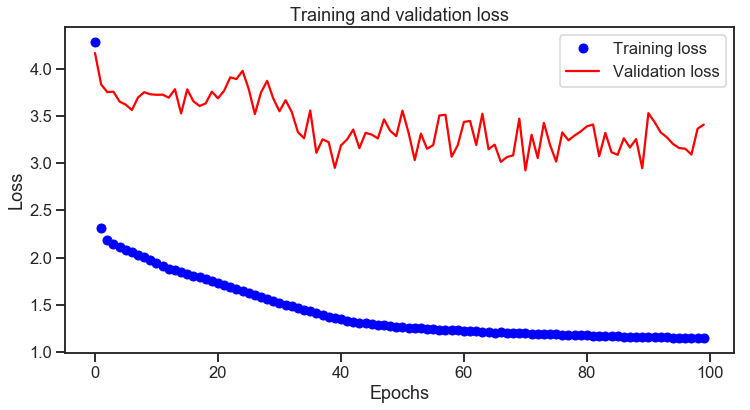

In [225]:
loss = basic_model_history.history['loss']
val_loss = basic_model_history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

fig.savefig(os.path.join(filepath, 'basic_model_history_training_validation_loss.png'))

In [229]:
print(np.argmin(val_loss))
val_loss[70]

70


2.92458125137421

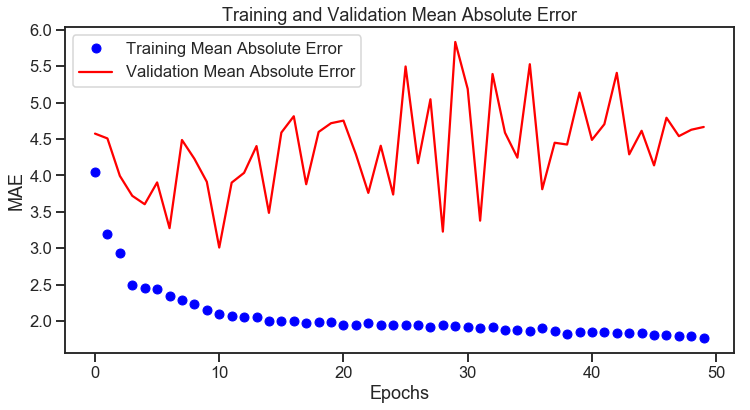

In [227]:
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(len(mae))

fig_mae = plt.figure(figsize=(12,6))
ax_mae = fig_mae.add_subplot(111)

plt.plot(epochs, mae, 'bo', label='Training Mean Absolute Error')
plt.plot(epochs, val_mae, 'r', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
fig.savefig(os.path.join(filepath, 'basic_model_history_training_validation_mae.png'))

In [216]:
basic_lstm_model_predictions = model.predict(forecasters_test)
basic_lstm_model_evaluation =  model.evaluate(forecasters_test, pollution_real_test)
print(basic_lstm_model_evaluation)
print(model.metrics_names)

2494/2494 [==============================] - 0s 54us/step
[4.048600244636811, 4.048600244636811, 84.26814344240937]
['loss', 'mean_absolute_error', 'mean_squared_error']


### Creation Neural Network Architecture,Training & Evaluation  On Recurrent LSTM and DROPOUT layers
The last parameter with the value 18 represents, the number of features

In [198]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

regressor_model = Sequential()
regressor_model.add(LSTM(units=100, return_sequences = True, input_shape = (forecasters.shape[1],18)))
regressor_model.add(Dropout(0.3))

regressor_model.add(LSTM(units = 50, return_sequences = True))
regressor_model.add(Dropout(0.2))

regressor_model.add(LSTM(units = 50, return_sequences = True))
regressor_model.add(Dropout(0.2))

regressor_model.add(LSTM(units = 50))
regressor_model.add(Dropout(0.2))

regressor_model.add(Dense(units = 1))

regressor_model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['mean_absolute_error','mean_squared_error'] )

##Training the model
history = regressor_model.fit(forecasters, pollution_real,epochs = 50,
                              validation_data=(forecasters_validation,pollution_real_validation),batch_size = 32)

Train on 8736 samples, validate on 1245 samples
Epoch 1/50
8736/8736 [==============================] - 16s 2ms/step - loss: 44.2988 - mean_absolute_error: 4.0428 - mean_squared_error: 44.2988 - val_loss: 40.6145 - val_mean_absolute_error: 4.5751 - val_mean_squared_error: 40.6145
Epoch 2/50
8736/8736 [==============================] - 8s 905us/step - loss: 32.6566 - mean_absolute_error: 3.2006 - mean_squared_error: 32.6566 - val_loss: 39.8555 - val_mean_absolute_error: 4.5090 - val_mean_squared_error: 39.8555
Epoch 3/50
8736/8736 [==============================] - 8s 877us/step - loss: 30.8411 - mean_absolute_error: 2.9402 - mean_squared_error: 30.8411 - val_loss: 35.0234 - val_mean_absolute_error: 3.9950 - val_mean_squared_error: 35.0234
Epoch 4/50
8736/8736 [==============================] - 8s 901us/step - loss: 27.6877 - mean_absolute_error: 2.4953 - mean_squared_error: 27.6877 - val_loss: 31.3834 - val_mean_absolute_error: 3.7209 - val_mean_squared_error: 31.3834
Epoch 5/50
8736/8

8736/8736 [==============================] - 8s 884us/step - loss: 16.7040 - mean_absolute_error: 1.8845 - mean_squared_error: 16.7040 - val_loss: 28.0963 - val_mean_absolute_error: 4.2451 - val_mean_squared_error: 28.0963
Epoch 36/50
8736/8736 [==============================] - 8s 872us/step - loss: 16.5745 - mean_absolute_error: 1.8708 - mean_squared_error: 16.5745 - val_loss: 39.9466 - val_mean_absolute_error: 5.5282 - val_mean_squared_error: 39.9466
Epoch 37/50
8736/8736 [==============================] - 8s 894us/step - loss: 16.8210 - mean_absolute_error: 1.9056 - mean_squared_error: 16.8210 - val_loss: 23.6075 - val_mean_absolute_error: 3.8116 - val_mean_squared_error: 23.6075
Epoch 38/50
8736/8736 [==============================] - 8s 912us/step - loss: 16.4739 - mean_absolute_error: 1.8581 - mean_squared_error: 16.4739 - val_loss: 28.0683 - val_mean_absolute_error: 4.4496 - val_mean_squared_error: 28.0683
Epoch 39/50
8736/8736 [==============================] - 8s 889us/step -

In [199]:
#regressor_model.save('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/airquality_prediction_bugolobi_04_20_2019.h5')

regressor_model.save(os.path.join(filepath,'airquality_prediction_model.h5'))
regressor_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 3, 100)            47600     
_________________________________________________________________
dropout_28 (Dropout)         (None, 3, 100)            0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 3, 50)             30200     
_________________________________________________________________
dropout_29 (Dropout)         (None, 3, 50)             0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 3, 50)             20200     
_________________________________________________________________
dropout_30 (Dropout)         (None, 3, 50)             0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 50)                20200     
__________

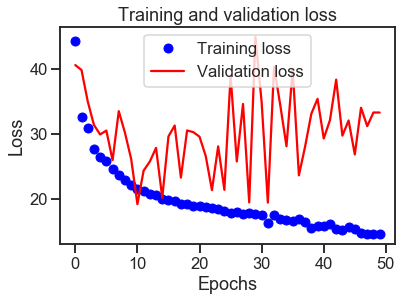

In [200]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

fig.savefig(os.path.join(filepath, 'deep_lstm_model_history_training_validation_mae.png'))

In [ ]:
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(len(mae))

fig_mae = plt.figure(figsize=(12,6))
ax_mae = fig_mae.add_subplot(111)

plt.plot(epochs, mae, 'bo', label='Training Mean Absolute Error')
plt.plot(epochs, val_mae, 'r', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
fig.savefig(os.path.join(filepath, 'deep_lst_mmodel_history_training_validation_mae.png'))

### Making predictions (forecasts) using the deep recurrent lstm
1. Convert test set in the same format accepted by model
1. make the forecasts directly on the testing dataset

### Make prediction using the developed model

In [151]:
predictions = regressor_model.predict(forecasters_test)

In [106]:
#print(forecasters_test.shape)
print(predictions.shape)

(2494, 1)


In [152]:
print('predictions', predictions.mean())
print('actual pm2.5 values', pollution_real.mean())

predictions 8.151512
actual pm2.5 values 10.641118360805862


### Verification of the average in the results of the forecasts and in the actual results

In [153]:
print('predictions', predictions.mean())
print('actual pm2.5 values', pollution_real.mean())

predictions 8.151512
actual pm2.5 values 10.641118360805862


### Visualization of the predictions and actual values of PM2.5
1. #### using bar chart

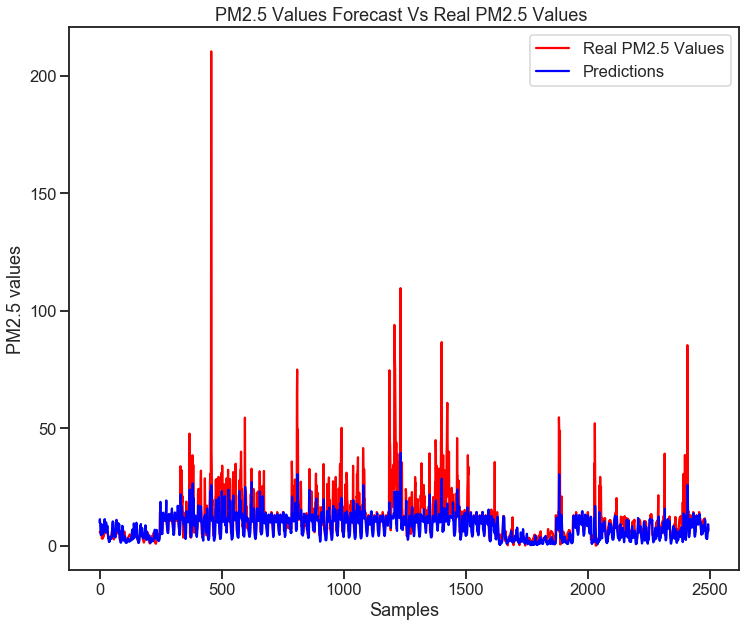

In [156]:
plt.figure(figsize=(12,10))
plt.plot(pollution_real_test, color = 'red', label = 'Real PM2.5 Values')
plt.plot(predictions, color = 'blue', label = 'Predictions')
plt.title('PM2.5 Values Forecast Vs Real PM2.5 Values ')
plt.xlabel('Samples')
plt.ylabel('PM2.5 values')
plt.legend()

### 2. using line graphs

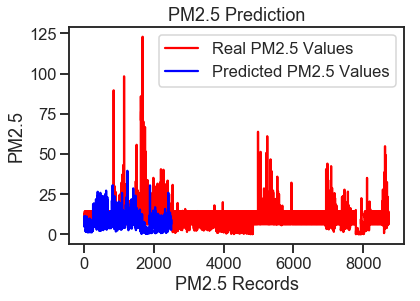

In [155]:
plt.plot(pollution_real, color = 'red', label = 'Real PM2.5 Values')
plt.plot(predictions, color = 'blue', label = 'Predicted PM2.5 Values')
plt.title('PM2.5 Prediction')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

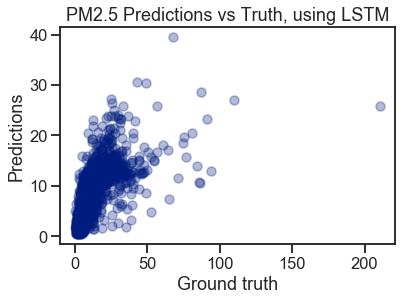

In [157]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(pollution_real_test, predictions, alpha=.3)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='PM2.5 Predictions vs Truth, using LSTM');

### saving results to file

In [ ]:
with open(os.path.join(filepath, "results_summary.txt"), "w+") as text_file:
        print("SVR RMSE : {}\n SVR MAE : {} \n Basic LSTM: {}"
              .format(svr_rmse.round(2),svr_mae.round(2),  ), file=text_file)